<a href="https://colab.research.google.com/github/adam-fikri/bingka-recognition-system/blob/main/Bingka_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Others
from sklearn.datasets import load_files       
from sklearn.model_selection import train_test_split
from PIL import Image #get image in greyscale
import pandas as pd

#Visualize model
from keras.utils.vis_utils import plot_model

print(tf.__version__)

2.4.1


In [ ]:
#classes/labels (follow alphabet)
class_names = ['Bingka Durian', 'Bingka Keledek Ungu', 'Bingka Labu', 'Bingka Pandan', 'Bingka Pisang']
dim = 28 #length/width of picture
bingkaNum = len(class_names)

In [ ]:
#just nk tgk result data filename and target
def get_data(path):
  data = load_files(path)
  return data['filenames'], np.array(data['target'])

#try reka
def load_kuih(path):
  data = load_files(path)
  kuih_files = np.array(data['filenames'])
  kuih_images = []
  for i in range(len(kuih_files)):
    img = np.array(Image.open(kuih_files[i]).convert('L').resize((dim, dim)))
    kuih_images.append(img)
  
  kuih_labels = np.array(data['target'])
  return kuih_files, np.asarray(kuih_images), kuih_labels 
  #kuih_files is to validate in next step

def save_file(images, labels, filename):
  df = pd.DataFrame()
  processedImages = []
  for i in range(len(images)):
    new_image = np.ravel(images[i])
    new_image = (',').join(str(j) for j in new_image)
    processedImages.append(new_image)

  df['images'] = processedImages
  df['labels'] = labels
  df.to_csv(filename, index=False)


def reshape(image):
  image =  image.split(',')
  image = [int(i) for i in image]
  image = np.asarray(image)
  return image.reshape(dim,dim)


In [ ]:
files, images, labels = load_kuih('/content/drive/MyDrive/Bingka')
train_images, test_images, train_labels, test_labels, train_files, test_files = train_test_split(images, labels, files, test_size=0.2)

File path: /content/drive/MyDrive/Bingka/Bingka Labu/ (25).jpg
Bingka_name:  Bingka Labu


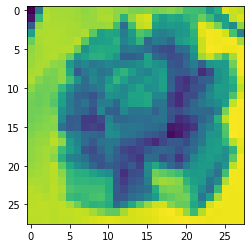

In [ ]:
#validating load_kuih function
i = 0
print('File path:', train_files[i])

print('Bingka_name: ',class_names[train_labels[i]])

plt.imshow(train_images[i])

In [ ]:
save_file(train_images,train_labels, '/content/drive/MyDrive/train_data.csv')
save_file(test_images,test_labels, '/content/drive/MyDrive/test_data.csv')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test_data.csv')

In [ ]:
train_df

,images,labels
0,"22,114,223,220,219,219,217,212,216,221,219,212...",2
1,"170,166,170,171,168,169,170,174,171,157,140,14...",0
2,"60,47,54,65,58,63,61,54,33,18,29,25,17,59,87,1...",1
3,"0,2,6,10,16,22,27,32,37,41,44,46,46,46,44,42,4...",0
4,"186,189,192,218,219,234,233,233,230,219,201,16...",3
...,...,...
195,"31,29,40,33,22,26,60,136,85,45,51,59,83,147,99...",0
196,"176,178,180,183,183,182,181,183,184,184,185,18...",2
197,"88,80,64,109,138,141,101,121,130,94,50,47,41,3...",1
198,"112,138,196,201,200,201,207,203,208,203,178,18...",4


In [ ]:
test_df

,images,labels
0,"64,64,63,68,79,81,87,89,90,89,92,91,118,185,24...",0
1,"142,135,147,152,173,201,181,176,194,167,167,17...",3
2,"21,20,20,19,20,19,20,20,20,20,21,17,17,21,20,2...",1
3,"25,26,26,37,38,31,42,61,83,98,105,91,79,74,69,...",2
4,"58,61,85,44,13,12,11,42,99,70,73,72,65,57,51,4...",3
5,"80,155,181,132,112,91,151,221,195,108,92,91,81...",3
6,"143,142,129,135,154,180,146,139,140,131,123,11...",2
7,"142,141,122,107,103,101,120,145,156,157,162,15...",1
8,"78,66,62,74,152,170,188,186,193,200,196,199,20...",4
9,"40,54,49,54,57,54,53,55,57,58,56,59,55,50,45,4...",4


In [ ]:
train_df['newImages'] = train_df['images'].apply(reshape)
test_df['newImages'] = test_df['images'].apply(reshape)

In [ ]:
train_df

,images,labels,newImages
0,"22,114,223,220,219,219,217,212,216,221,219,212...",2,"[[22, 114, 223, 220, 219, 219, 217, 212, 216, ..."
1,"170,166,170,171,168,169,170,174,171,157,140,14...",0,"[[170, 166, 170, 171, 168, 169, 170, 174, 171,..."
2,"60,47,54,65,58,63,61,54,33,18,29,25,17,59,87,1...",1,"[[60, 47, 54, 65, 58, 63, 61, 54, 33, 18, 29, ..."
3,"0,2,6,10,16,22,27,32,37,41,44,46,46,46,44,42,4...",0,"[[0, 2, 6, 10, 16, 22, 27, 32, 37, 41, 44, 46,..."
4,"186,189,192,218,219,234,233,233,230,219,201,16...",3,"[[186, 189, 192, 218, 219, 234, 233, 233, 230,..."
...,...,...,...
195,"31,29,40,33,22,26,60,136,85,45,51,59,83,147,99...",0,"[[31, 29, 40, 33, 22, 26, 60, 136, 85, 45, 51,..."
196,"176,178,180,183,183,182,181,183,184,184,185,18...",2,"[[176, 178, 180, 183, 183, 182, 181, 183, 184,..."
197,"88,80,64,109,138,141,101,121,130,94,50,47,41,3...",1,"[[88, 80, 64, 109, 138, 141, 101, 121, 130, 94..."
198,"112,138,196,201,200,201,207,203,208,203,178,18...",4,"[[112, 138, 196, 201, 200, 201, 207, 203, 208,..."


In [ ]:
test_df

,images,labels,newImages
0,"64,64,63,68,79,81,87,89,90,89,92,91,118,185,24...",0,"[[64, 64, 63, 68, 79, 81, 87, 89, 90, 89, 92, ..."
1,"142,135,147,152,173,201,181,176,194,167,167,17...",3,"[[142, 135, 147, 152, 173, 201, 181, 176, 194,..."
2,"21,20,20,19,20,19,20,20,20,20,21,17,17,21,20,2...",1,"[[21, 20, 20, 19, 20, 19, 20, 20, 20, 20, 21, ..."
3,"25,26,26,37,38,31,42,61,83,98,105,91,79,74,69,...",2,"[[25, 26, 26, 37, 38, 31, 42, 61, 83, 98, 105,..."
4,"58,61,85,44,13,12,11,42,99,70,73,72,65,57,51,4...",3,"[[58, 61, 85, 44, 13, 12, 11, 42, 99, 70, 73, ..."
5,"80,155,181,132,112,91,151,221,195,108,92,91,81...",3,"[[80, 155, 181, 132, 112, 91, 151, 221, 195, 1..."
6,"143,142,129,135,154,180,146,139,140,131,123,11...",2,"[[143, 142, 129, 135, 154, 180, 146, 139, 140,..."
7,"142,141,122,107,103,101,120,145,156,157,162,15...",1,"[[142, 141, 122, 107, 103, 101, 120, 145, 156,..."
8,"78,66,62,74,152,170,188,186,193,200,196,199,20...",4,"[[78, 66, 62, 74, 152, 170, 188, 186, 193, 200..."
9,"40,54,49,54,57,54,53,55,57,58,56,59,55,50,45,4...",4,"[[40, 54, 49, 54, 57, 54, 53, 55, 57, 58, 56, ..."


In [ ]:
train_images = np.asarray(train_df['newImages'].to_list())
train_labels = np.asarray(train_df['labels'].to_list())

test_images = np.asarray(test_df['newImages'].to_list())
test_labels = np.asarray(test_df['labels'].to_list())

Bingka_name:  Bingka Labu


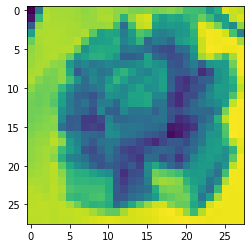

In [ ]:
i = 0

print('Bingka_name: ',class_names[train_labels[i]])

plt.imshow(train_images[i])

In [ ]:
train_images.shape

(200, 28, 28)

In [ ]:
len(train_labels)

200

In [ ]:
test_images.shape

(50, 28, 28)

In [ ]:
len(test_labels)

50

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

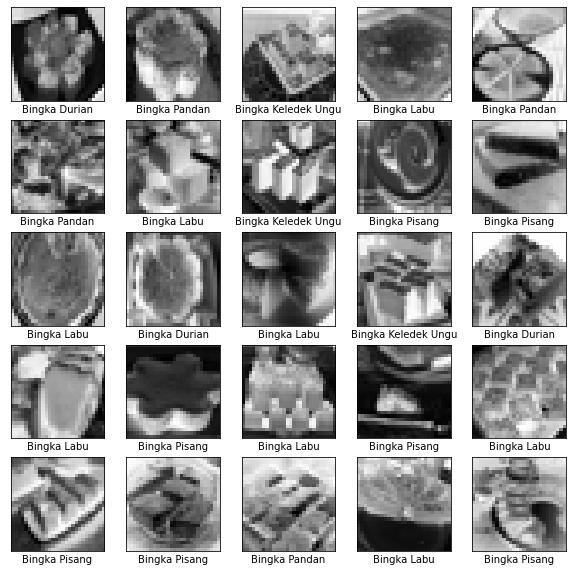

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(dim, dim)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(bingkaNum)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=200)

Epoch 1/200
7/7 [==============================] - 3s 3ms/step - loss: 1.8290 - accuracy: 0.1968
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 1.6907 - accuracy: 0.2564
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 1.7172 - accuracy: 0.2277
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 1.5385 - accuracy: 0.3550
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 1.5595 - accuracy: 0.2998
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 1.4883 - accuracy: 0.3444
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 1.4696 - accuracy: 0.3241
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 1.5492 - accuracy: 0.2800
Epoch 9/200
7/7 [==============================] - 0s 3ms/step - loss: 1.5226 - accuracy: 0.2940
Epoch 10/200
7/7 [==============================] - 0s 3ms/step - loss: 1.4151 - accuracy: 0.4302
Epoch 11/200
7/7 [===========

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 3.4542 - accuracy: 0.3200

Test accuracy: 0.3199999928474426


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([9.9996078e-01, 1.2248688e-08, 1.2636836e-05, 2.1459911e-05,
       5.1330985e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
test_labels[0]

0

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

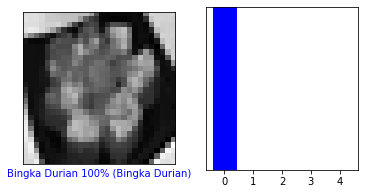

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.8656880e-04 1.0093997e-03 4.1794111e-03 9.9450463e-01 2.0072795e-05]]


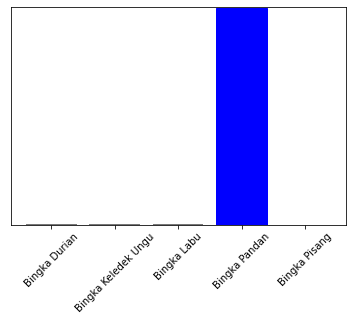

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(5), class_names, rotation=45)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 268,037
Trainable params: 268,037
Non-trainable params: 0
_________________________________________________________________


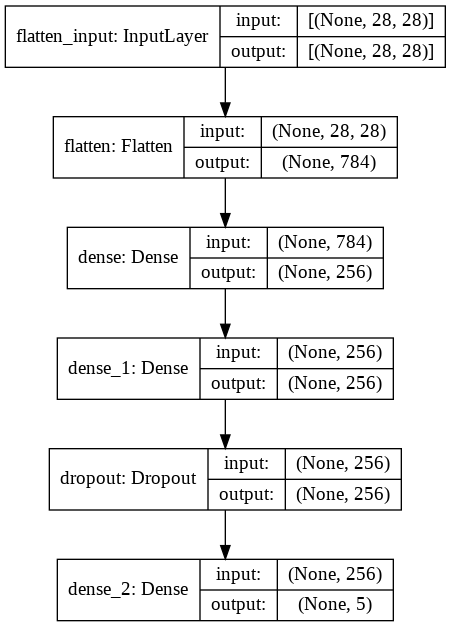

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)